In [96]:
#import the libraries
import pandas as pd

In [97]:
#import the dataset
df = pd.read_excel("/content/height (1).xls")


In [98]:
#View the columns
print(df.columns)
#shape of the data
print(df.shape)

Index(['id', 'dad_height', 'mom_height', 'sex', 'age', 'height', 'weight',
       'hand', 'dad_hand', 'mom_hand'],
      dtype='object')
(70, 10)


In [99]:
#read the dataset
df.head()

,id,dad_height,mom_height,sex,age,height,weight,hand,dad_hand,mom_hand
0,1,64,66,M,39.105161,65,155,R,R,R
1,2,60,59,M,37.033271,76,164,R,R,R
2,3,76,65,M,41.616987,76,136,R,R,R
3,4,69,63,F,44.324557,63,185,R,R,R
4,5,68,66,f,39.661683,63,152,R,R,R


In [100]:
#drop id column
df.drop('id', axis =1, inplace = True)

In [101]:
#shape of the dataset
df.shape

(70, 9)

In [102]:
#general info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dad_height  70 non-null     int64  
 1   mom_height  70 non-null     int64  
 2   sex         70 non-null     object 
 3   age         70 non-null     float64
 4   height      70 non-null     int64  
 5   weight      70 non-null     object 
 6   hand        70 non-null     object 
 7   dad_hand    70 non-null     object 
 8   mom_hand    70 non-null     object 
dtypes: float64(1), int64(3), object(5)
memory usage: 5.0+ KB


In [103]:
def replace_empty_with_null(cell):
  if cell == " " or pd.isnull(cell):
    return None
  else:
    return cell
df = df.applymap(replace_empty_with_null)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dad_height  70 non-null     int64  
 1   mom_height  70 non-null     int64  
 2   sex         70 non-null     object 
 3   age         70 non-null     float64
 4   height      70 non-null     int64  
 5   weight      67 non-null     float64
 6   hand        70 non-null     object 
 7   dad_hand    70 non-null     object 
 8   mom_hand    70 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 5.0+ KB


In [105]:
#number of nulls in weight
df.weight.isnull().sum()

3

In [106]:
# df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
# df.weight.head(2)


In [129]:
weight_mean = df['weight'].mean()
df['weight'].fillna(weight_mean, inplace = True)
df.weight.head()

0    155.0
1    164.0
2    136.0
3    185.0
4    152.0
Name: weight, dtype: float64

In [134]:
df['mom_height'].describe()

count    70.000000
mean     63.700000
std       4.267674
min      55.000000
25%      61.000000
50%      63.000000
75%      67.000000
max      76.000000
Name: mom_height, dtype: float64

In [135]:
df['dad_height'].describe()

count     70.000000
mean      69.542857
std       15.218872
min        7.000000
25%       68.000000
50%       69.000000
75%       71.000000
max      176.000000
Name: dad_height, dtype: float64

In [108]:
#Check for values
#hand
print("Hand")
print(df['hand'].value_counts())
#dad_hand
print("Dad hand")
print(df['dad_hand'].value_counts())
#mom_hand
print("Mom hand")
print(df['mom_hand'].value_counts())

Hand
R    57
L    13
Name: hand, dtype: int64
Dad hand
R    57
L    11
l     1
r     1
Name: dad_hand, dtype: int64
Mom hand
R    54
L    14
r     2
Name: mom_hand, dtype: int64


In [109]:
#try to clean it
df['mom_hand'].replace({'r':'R'}, inplace = True)
#check uniques
df.mom_hand.unique()

array(['R', 'L'], dtype=object)

In [110]:
df['dad_hand'].replace({'r':'R', 'l':'L'}, inplace = True)
#check uniques
df.dad_hand.unique()

array(['R', 'L'], dtype=object)

In [111]:
df['BMI'] = (df['weight']*0.4536)/ ((df['height']*0.0254)*(df['height']*0.0254))
df.sample(3)

,dad_height,mom_height,sex,age,height,weight,hand,dad_hand,mom_hand,BMI
48,71,61,M,49.584727,71,160.895522,L,L,R,22.440518
59,70,65,M,43.029322,70,188.000000,L,R,L,26.975368
18,67,56,M,44.905341,70,193.000000,R,R,R,27.692798


In [112]:
df['BMI'].describe()

count    70.000000
mean     24.439274
std       3.162910
min      16.554548
25%      22.513897
50%      23.838872
75%      26.398668
max      32.771494
Name: BMI, dtype: float64

In [113]:
df.loc[df['BMI'] <= 18.4, 'BMIcat'] = 'under'
df.loc[df['BMI'] >= 25, 'BMIcat'] = 'over'
df.loc[(df['BMI'] > 18.4) & (df['BMI'] <= 24.9), 'BMIcat'] = 'normal'

In [114]:
df.sample(5)

,dad_height,mom_height,sex,age,height,weight,hand,dad_hand,mom_hand,BMI,BMIcat
61,65,62,M,35.480096,74,174.0,R,R,L,22.340425,normal
7,70,62,M,41.078957,66,185.0,R,R,R,29.859977,over
36,69,67,F,42.986605,65,138.0,L,R,L,22.964552,normal
52,67,64,M,41.678572,71,163.0,R,R,L,22.734035,normal
18,67,56,M,44.905341,70,193.0,R,R,R,27.692798,over


In [115]:
underweight_count = df.loc[df['BMIcat']=='under']
print('Total count is:', len(underweight_count))

Total count is: 3


In [116]:
(df['BMIcat'] == 'under').sum()

3

In [117]:
men_overweight = df.loc[(df['sex']== 'M') & (df['BMIcat'] == 'over')]
len(men_overweight)

12

In [118]:
((df['sex']== 'M') & (df['BMIcat'] == 'over')).sum()

12

In [119]:
right_women_normal_over30 = df.loc[(df['mom_hand']=='R') & (df['sex'] == 'F') & (df['age'] >= 30) & (df['BMIcat'] == 'normal')]
len(right_women_normal_over30)

11

In [120]:
((df['mom_hand']=='R') & (df['sex'] == 'F') & (df['age'] >= 30) & (df['BMIcat'] == 'normal')).sum()


11

In [131]:
women_over30 = df[(df['sex'] == 'F') & (df['age'] >= 30)]
print("The count of women over age 30 is : ", len(women_over30))
total_over30 = len(women_over30)
women_over30

The count of women over age 30 is :  31


,dad_height,mom_height,sex,age,height,weight,hand,dad_hand,mom_hand,BMI,BMIcat,gender
3,69,63,F,44.324557,63,185.000000,R,R,R,32.771494,over,Female
4,68,66,F,39.661683,63,152.000000,R,R,R,26.925768,over,Female
6,67,62,F,33.375102,64,148.000000,L,R,L,25.404309,over,Female
8,67,62,F,45.436269,65,159.000000,R,R,R,26.459158,over,Female
9,69,62,F,45.602317,66,162.000000,L,R,L,26.147656,over,Female
14,68,61,F,38.020630,71,159.000000,L,L,R,22.176144,normal,Female
20,68,61,F,40.909302,65,151.000000,R,R,R,25.127880,over,Female
23,69,70,F,34.052709,68,140.000000,R,R,R,21.287067,normal,Female
25,70,67,F,33.245929,71,160.895522,R,R,R,22.440518,normal,Female
26,71,71,F,43.318917,70,162.000000,R,R,L,23.244732,normal,Female


In [122]:
women_over30_normal = women_over30[(women_over30['BMIcat'] == 'normal')]
print("The count of women over 30 with normal weight is: ", len(women_over30_normal))
total_over30_normal = len(women_over30_normal)
women_over30_normal.sample(5)

The count of women over 30 with normal weight is:  17


,dad_height,mom_height,sex,age,height,weight,hand,dad_hand,mom_hand,BMI,BMIcat
29,72,65,F,39.962062,69,163.000000,R,R,R,24.071050,normal
58,68,62,F,37.075881,68,159.000000,R,R,L,24.176026,normal
25,70,67,F,33.245929,71,160.895522,R,R,R,22.440518,normal
56,68,64,F,41.222071,68,153.000000,R,R,R,23.263723,normal
69,71,62,F,44.111746,69,157.000000,R,R,R,23.184999,normal


In [123]:
#% of right handed women over age 30
percentage = ((total_over30_normal) / (total_over30)) * 100
percentage

56.666666666666664

In [124]:
df['sex'].value_counts()

F     36
M     32
f      1
Mm     1
Name: sex, dtype: int64

In [125]:
df['sex'].replace({'Mm':'M', 'f':'F'}, inplace = True)
df['sex'].unique()

array(['M', 'F'], dtype=object)

In [126]:
df.loc[df['sex'] == 'M', 'gender'] = "Male"
df.loc[df['sex'] == 'F', 'gender'] = "Female"
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

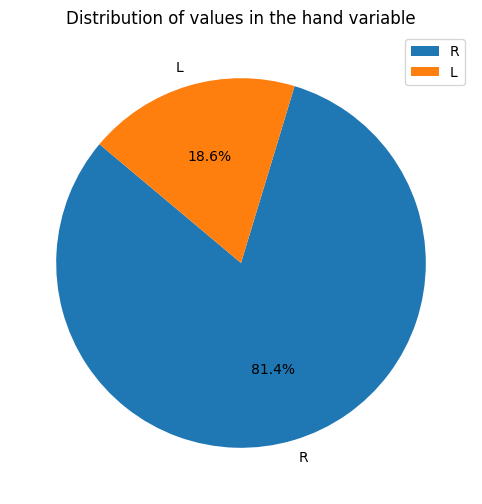

In [133]:
import matplotlib.pyplot as plt
hand_value_counts = df['hand'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(hand_value_counts, labels = hand_value_counts.index, autopct="%1.1f%%", startangle= 140)
plt.title("Distribution of values in the hand variable")
plt.legend()
plt.show()